<a href="https://colab.research.google.com/github/athabrani/DeepLearning/blob/main/Tugas_week_1_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from imblearn.over_sampling import SMOTE

In [52]:
url = 'https://github.com/farrelrassya/teachingMLDL/raw/main/02.%20Deep%20Learning/Dataset/Infrared.csv'
data = pd.read_csv(url)

In [53]:
data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [54]:
print(data.head())
print(data.info())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    34.5300     

In [55]:
data.select_dtypes(include=np.number).corr()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
T_atm,1.000000,0.119270,0.033377,0.616912,0.275363,0.292344,0.269869,0.311260,0.287289,0.280530,...,0.368740,0.388760,0.393838,0.329755,0.339329,0.389521,0.242280,0.233001,0.230146,0.098663
Humidity,0.119270,1.000000,0.008468,0.224086,0.050884,0.060754,0.101012,0.112754,0.058080,0.044929,...,0.033311,0.040234,0.061012,0.036980,0.006943,0.038868,0.064231,0.111888,0.110408,0.063595
Distance,0.033377,0.008468,1.000000,0.024831,-0.024479,-0.022900,-0.051634,-0.054362,-0.012427,-0.024331,...,-0.008938,-0.009554,-0.022870,-0.014081,-0.022385,-0.012941,0.007898,0.013631,0.014242,0.011181
T_offset1,0.616912,0.224086,0.024831,1.000000,0.239208,0.260545,0.237177,0.279728,0.249420,0.242019,...,0.348724,0.368220,0.371284,0.317587,0.304540,0.355541,0.191369,0.181496,0.177910,0.139041
Max1R13_1,0.275363,0.050884,-0.024479,0.239208,1.000000,0.901213,0.868731,0.825698,0.981819,0.995478,...,0.665614,0.617565,0.702868,0.566860,0.703221,0.720179,0.873412,0.734474,0.733324,0.741902
Max1L13_1,0.292344,0.060754,-0.022900,0.260545,0.901213,1.000000,0.775313,0.896370,0.906892,0.901218,...,0.640706,0.612534,0.692723,0.559005,0.691522,0.707298,0.867470,0.729175,0.727941,0.735644
aveAllR13_1,0.269869,0.101012,-0.051634,0.237177,0.868731,0.775313,1.000000,0.858994,0.826354,0.868849,...,0.609243,0.581719,0.683231,0.535339,0.628209,0.664829,0.745489,0.657640,0.656137,0.620874
aveAllL13_1,0.311260,0.112754,-0.054362,0.279728,0.825698,0.896370,0.858994,1.000000,0.809478,0.826757,...,0.620341,0.599982,0.697290,0.551961,0.653166,0.677782,0.774758,0.675740,0.674287,0.645084
T_RC1,0.287289,0.058080,-0.012427,0.249420,0.981819,0.906892,0.826354,0.809478,1.000000,0.982699,...,0.667143,0.620701,0.704861,0.570513,0.715962,0.729618,0.892319,0.746736,0.745588,0.768730
T_RC_Dry1,0.280530,0.044929,-0.024331,0.242019,0.995478,0.901218,0.868849,0.826757,0.982699,1.000000,...,0.678681,0.630409,0.717506,0.579582,0.718977,0.734562,0.878937,0.736340,0.735246,0.748566


In [56]:
X = data.select_dtypes(include=np.number).drop('aveOralM', axis=1)
y = data['aveOralM']

In [57]:
# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create a StandardScaler instance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Konversi ke array NumPy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Scaler untuk y
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [60]:
#cek apakah ada nilai NaN
print(np.isnan(y_train).sum(), np.isnan(y_test).sum())

#cek rentang nilai
print(np.min(y_train), np.max(y_train))

0 0
-2.8538428229963038 6.357852400632109


In [61]:
np.unique(y_test)

array([-2.27811187, -1.79833608, -1.60642576, -1.31856029, -1.22260513,
       -1.12664997, -1.03069481, -0.93473965, -0.83878449, -0.74282933,
       -0.64687418, -0.55091902, -0.45496386, -0.3590087 , -0.26305354,
       -0.16709838, -0.07114322,  0.02481193,  0.12076709,  0.21672225,
        0.31267741,  0.40863257,  0.50458773,  0.60054289,  0.69649804,
        0.7924532 ,  0.88840836,  0.98436352,  1.08031868,  1.17627384,
        1.272229  ,  1.36818415,  1.46413931,  1.65604963,  1.75200479,
        1.84795995,  1.94391511,  2.23178058,  2.4236909 ,  2.51964606,
        3.19133217,  3.28728733,  4.05492859])

In [62]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Membangun Model dengan PyTorch

In [63]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(30, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return out

model = RegressionModel()

In [64]:
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].shape)

torch.Size([64, 30])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [65]:
# Konversi ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [66]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [67]:
#Data loader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


#Early stop
best_loss = float('inf')  # Inisialisasi dengan nilai loss tertinggi
patience = 10              # Maksimum epoch tanpa perbaikan
counter = 0               # Menghitung berapa epoch tanpa perbaikan


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for x, target in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}]: Loss = {avg_loss:.6f}")


    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            model.load_state_dict(best_model)
            break

Epoch [1/100]: Loss = 0.495854
Epoch [2/100]: Loss = 0.311877
Epoch [3/100]: Loss = 0.270175
Epoch [4/100]: Loss = 0.260683
Epoch [5/100]: Loss = 0.243480
Epoch [6/100]: Loss = 0.245615
Epoch [7/100]: Loss = 0.229715
Epoch [8/100]: Loss = 0.226230
Epoch [9/100]: Loss = 0.224731
Epoch [10/100]: Loss = 0.213950
Epoch [11/100]: Loss = 0.216434
Epoch [12/100]: Loss = 0.215157
Epoch [13/100]: Loss = 0.208007
Epoch [14/100]: Loss = 0.212293
Epoch [15/100]: Loss = 0.211167
Epoch [16/100]: Loss = 0.210047
Epoch [17/100]: Loss = 0.212869
Epoch [18/100]: Loss = 0.204060
Epoch [19/100]: Loss = 0.202571
Epoch [20/100]: Loss = 0.198969
Epoch [21/100]: Loss = 0.198216
Epoch [22/100]: Loss = 0.197684
Epoch [23/100]: Loss = 0.195890
Epoch [24/100]: Loss = 0.198832
Epoch [25/100]: Loss = 0.193445
Epoch [26/100]: Loss = 0.194064
Epoch [27/100]: Loss = 0.202666
Epoch [28/100]: Loss = 0.192038
Epoch [29/100]: Loss = 0.194866
Epoch [30/100]: Loss = 0.195569
Epoch [31/100]: Loss = 0.189769
Epoch [32/100]: L

In [68]:
model.eval()
total_loss = 0

y_preds = []
y_actuals = []


test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)

train_mse = mean_squared_error(y_train, y_train_pred.numpy())
test_mse = mean_squared_error(y_test, y_test_pred.numpy())
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred.numpy())
test_r2 = r2_score(y_test, y_test_pred.numpy())

print(f'Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}')
print(f'Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}')

Train MSE: 0.1419, RMSE: 0.3767, R-squared: 0.8581
Test MSE: 0.2012, RMSE: 0.4485, R-squared: 0.7406


# Membangun Model dengan Tensorflow

In [69]:
input = tf.keras.Input(shape=(30,))
x = tf.keras.layers.Dense(64, activation='relu')(input)
output = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=input, outputs=output)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse'
  )

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.3693 - val_loss: 0.5629
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4437 - val_loss: 0.4512
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3532 - val_loss: 0.4116
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3115 - val_loss: 0.3707
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3146 - val_loss: 0.3428
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2639 - val_loss: 0.3540
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2451 - val_loss: 0.3312
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2479 - val_loss: 0.3307
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2407 - val_loss: 0.3267
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2149 - val_loss: 0.3154
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2283 - val_loss: 0.3027
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

In [70]:

#Prediksi data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

tf_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
#Menghitung R-Square
tf_r2 = r2_score(y_test, model.predict(X_test))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [71]:
print(f'RMSE: {tf_rmse:.6f}, R-squared: {tf_r2:.6f}')


RMSE: 0.436489, R-squared: 0.754332


# Hasil

In [72]:
avg_loss = total_loss / len(test_loader)  # **Bagi dengan jumlah batch, bukan jumlah sample**
torch_rmse = torch.sqrt(torch.tensor(avg_loss)).item()


In [73]:
print('----------Hasil RMSE----------'.center(50))
print(f'Hasil RMSE Tensorflow: {tf_rmse}\nHasil RMSE PyTorch: {test_rmse}')
print()
print('----------Hasil RSquared----------'.center(50))
print(f'Hasil RSquared Tensorflow: {tf_r2}\nHasil RSquared PyTorch: {test_r2}')

          ----------Hasil RMSE----------          
Hasil RMSE Tensorflow: 0.4364887280852519
Hasil RMSE PyTorch: 0.4485238142177389

        ----------Hasil RSquared----------        
Hasil RSquared Tensorflow: 0.7543320411015568
Hasil RSquared PyTorch: 0.7405979134384137


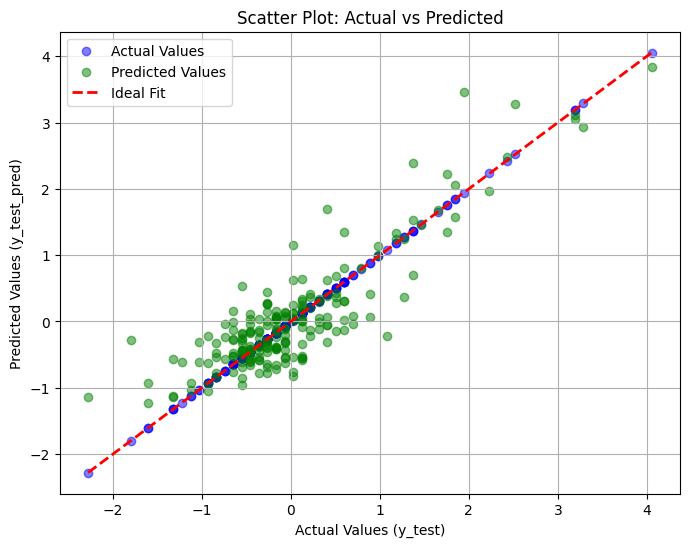

In [74]:

plt.figure(figsize=(8, 6))

# Scatter plot untuk nilai aktual (biru)
plt.scatter(y_test, y_test, alpha=0.5, color='blue', label='Actual Values')

# Scatter plot untuk nilai prediksi (hijau)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green', label='Predicted Values')

# Garis ideal (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')

# Label dan judul
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("Scatter Plot: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

# **Klasifikasi** **Model**

# Data exploring

In [75]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv'
data = pd.read_csv(url)

In [76]:
data['income'] = data['income'].astype(str).str.replace('.', '')

In [77]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [78]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [79]:
data.dropna(inplace=True) #menghapus nilai nan

In [80]:
data.drop_duplicates(inplace=True) #menghapus nilai duplikat

In [81]:
data.duplicated().sum()

0

In [82]:
encoder = LabelEncoder()
data = data.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)

In [83]:
data.drop(columns=['fnlwgt'], inplace=True)

In [84]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,9,13,4,10,3,4,1,0,0,40,39,0
48837,39,4,9,13,0,10,1,4,0,0,0,36,39,0
48839,38,4,9,13,2,10,0,4,1,0,0,50,39,0
48840,44,4,9,13,0,1,3,1,1,5455,0,40,39,0


In [85]:
data.select_dtypes(include=np.number).corr()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019286,-0.009915,0.032994,-0.264802,-0.014990,-0.259447,0.027835,0.086709,0.077971,0.057681,0.078942,-0.002456,0.231791
workclass,0.019286,1.000000,0.018351,0.041336,-0.052896,0.196623,-0.080488,0.055401,0.085477,0.033035,0.011122,0.114831,-0.004801,0.035948
education,-0.009915,0.018351,1.000000,0.356855,-0.039831,-0.022243,-0.011939,0.013653,-0.027336,0.029590,0.017963,0.057934,0.066485,0.081247
education-num,0.032994,0.041336,0.356855,1.000000,-0.068797,0.105014,-0.090406,0.031228,0.007852,0.125638,0.081807,0.143972,0.061747,0.333016
marital-status,-0.264802,-0.052896,-0.039831,-0.068797,1.000000,-0.005859,0.185499,-0.069807,-0.126528,-0.043035,-0.034087,-0.184562,-0.021525,-0.196507
occupation,-0.014990,0.196623,-0.022243,0.105014,-0.005859,1.000000,-0.067639,0.004781,0.069951,0.022008,0.017602,0.060785,-0.007565,0.066644
relationship,-0.259447,-0.080488,-0.011939,-0.090406,0.185499,-0.067639,1.000000,-0.117768,-0.581592,-0.056714,-0.057034,-0.253066,-0.004624,-0.253259
race,0.027835,0.055401,0.013653,0.031228,-0.069807,0.004781,-0.117768,1.000000,0.087861,0.011956,0.017985,0.040703,0.133838,0.071084
sex,0.086709,0.085477,-0.027336,0.007852,-0.126528,0.069951,-0.581592,0.087861,1.000000,0.047329,0.045541,0.230069,-0.009349,0.215318
capital-gain,0.077971,0.033035,0.029590,0.125638,-0.043035,0.022008,-0.056714,0.011956,0.047329,1.000000,-0.031724,0.082270,0.000228,0.222546


In [86]:
# Normalisasi fitur numerik
X = data.select_dtypes(include=np.number).drop('income', axis=1)
y = data['income']

In [87]:
print(Counter(y))

Counter({0: 36038, 1: 11535})


In [88]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [89]:
Counter(y_resampled)

Counter({0: 36038, 1: 36038})

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# klasifikasi dengan PyTorch





In [92]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [93]:
y_train_tensor

tensor([0, 0, 1,  ..., 0, 1, 1])

In [94]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Definisi model PyTorch
class IncomeModel(nn.Module):
    def __init__(self, input_size):
        super(IncomeModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output layer (2 kelas)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Inisialisasi model
model = IncomeModel(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [95]:
#Early stop
best_loss = float('inf')  # Inisialisasi dengan nilai loss tertinggi
patience = 10              # Maksimum epoch tanpa perbaikan
counter = 0               # Menghitung berapa epoch tanpa perbaikan


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for x, target in train_loader:
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}]: Loss = {avg_loss:.6f}")


    if avg_loss < best_loss:
        best_loss = avg_loss
        best_model = model.state_dict()
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            model.load_state_dict(best_model)
            break

Epoch [1/100]: Loss = 0.395973
Epoch [2/100]: Loss = 0.366500
Epoch [3/100]: Loss = 0.361171
Epoch [4/100]: Loss = 0.356026
Epoch [5/100]: Loss = 0.351372
Epoch [6/100]: Loss = 0.348550
Epoch [7/100]: Loss = 0.345926
Epoch [8/100]: Loss = 0.344200
Epoch [9/100]: Loss = 0.342242
Epoch [10/100]: Loss = 0.340244
Epoch [11/100]: Loss = 0.338713
Epoch [12/100]: Loss = 0.336849
Epoch [13/100]: Loss = 0.335626
Epoch [14/100]: Loss = 0.333804
Epoch [15/100]: Loss = 0.332042
Epoch [16/100]: Loss = 0.330612
Epoch [17/100]: Loss = 0.329043
Epoch [18/100]: Loss = 0.327373
Epoch [19/100]: Loss = 0.326477
Epoch [20/100]: Loss = 0.325629
Epoch [21/100]: Loss = 0.324271
Epoch [22/100]: Loss = 0.323023
Epoch [23/100]: Loss = 0.322836
Epoch [24/100]: Loss = 0.321255
Epoch [25/100]: Loss = 0.320411
Epoch [26/100]: Loss = 0.319876
Epoch [27/100]: Loss = 0.319136
Epoch [28/100]: Loss = 0.318064
Epoch [29/100]: Loss = 0.318028
Epoch [30/100]: Loss = 0.316944
Epoch [31/100]: Loss = 0.316972
Epoch [32/100]: L

In [96]:
model.eval()
total_loss = 0

y_preds = []
y_actuals = []

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  #menghentikan autograd saat evaluasi
    for x, target in test_loader:
        output = model(x)
        y_preds.extend(output.numpy().flatten())  # Simpan hasil prediksi
        y_actuals.extend(target.numpy().flatten())  # Simpan nilai aktual

y_preds = np.array(y_preds)
y_actuals = np.array(y_actuals)

In [97]:
y_actuals.flatten().shape

(14416,)

In [98]:
print("Jumlah sampel X_test:", X_test.flatten().shape)
print("Jumlah sampel y_actuals:", y_actuals.flatten().shape)

Jumlah sampel X_test: (187408,)
Jumlah sampel y_actuals: (14416,)


In [99]:
if len(y_preds) == 2 * len(y_actuals):
    y_preds = y_preds[: len(y_actuals)]


if len(y_preds.shape) == 1:
    y_preds_label = (y_preds >= 0.5).astype(int)  # Gunakan threshold 0.5
else:
    y_preds_label = np.argmax(y_preds, axis=1)  # Pilih kelas dengan probabilitas tertinggi

# Hitung metrik evaluasi
accuracy = accuracy_score(y_actuals, y_preds_label)
precision = precision_score(y_actuals, y_preds_label)
recall = recall_score(y_actuals, y_preds_label)
f1 = f1_score(y_test, y_preds_label)
auc = roc_auc_score(y_actuals, y_preds.flatten())

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.5026
Precision: 0.5016
Recall: 0.4357
F1-score: 0.4664
AUC: 0.5011


# klasifikasi dengan Tensorflow

In [100]:
y_train.dtype

dtype('int64')

In [101]:
X_train.shape


(57660, 13)

In [102]:
input = tf.keras.Input(shape=(13,))
x = tf.keras.layers.Dense(256, activation='relu')(input)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

tf_model = tf.keras.Model(input, output)

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

tf_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

# Prediksi
y_pred_probs = tf_model.predict(X_test)  # Probabilitas output
y_pred = (y_pred_probs > 0.5).astype(int)  # Konversi ke kelas

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8041 - loss: 0.4192 - val_accuracy: 0.8312 - val_loss: 0.3652
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8347 - loss: 0.3626 - val_accuracy: 0.8373 - val_loss: 0.3586
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8402 - loss: 0.3554 - val_accuracy: 0.8388 - val_loss: 0.3505
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8409 - loss: 0.3484 - val_accuracy: 0.8416 - val_loss: 0.3444
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8430 - loss: 0.3432 - val_accuracy: 0.8396 - val_loss: 0.3466
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8485 - loss: 0.3363 - val_accuracy: 0.8441 - val_loss: 0.3412
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8477 - loss: 0.3318 - val_accuracy: 0.8419 - val_loss: 0.3420
Epoch 8/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8501 - loss: 0.3289 - val_accu

451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Evaluasi TensorFlow:
Akurasi   : 0.8575
Presisi   : 0.8449
Recall    : 0.8748
F1 Score  : 0.8596
AUC Score : 0.8575
------------------------------


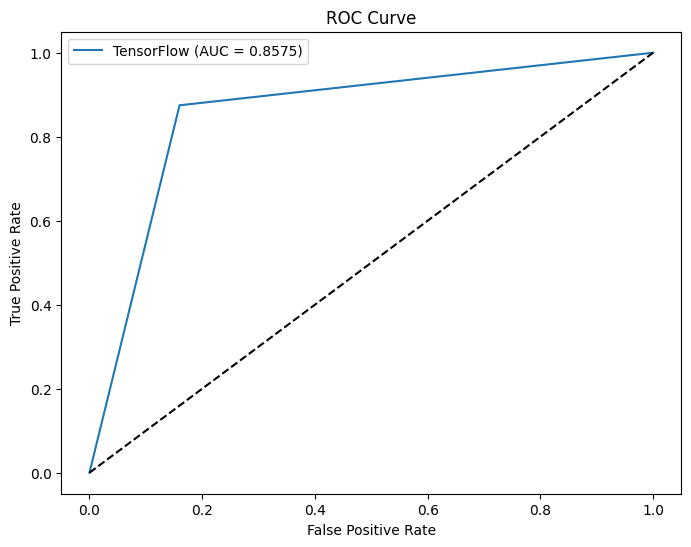

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



# Prediksi TensorFlow
y_pred_tf = (tf_model.predict(X_test) > 0.5).astype("int32").flatten()

# Evaluasi Metrik
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print(f"Evaluasi {model_name}:")
    print(f"Akurasi   : {acc:.4f}")
    print(f"Presisi   : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"AUC Score : {auc:.4f}")
    print("-" * 30)


# Evaluasi TensorFlow
evaluate_model(y_test, y_pred_tf, "TensorFlow")


fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_tf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tf, tpr_tf, label="TensorFlow (AUC = {:.4f})".format(roc_auc_score(y_test, y_pred_tf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [104]:
print(y_test.shape)
print(y_pred.shape)

(14416,)
(14416, 1)


# Laporan Evaluasi Model Deep Learning

## **1. Pembuatan Model Deep Learning**
Dalam tugas ini, dua model deep learning dibuat menggunakan **PyTorch** dan **TensorFlow**.  
Keduanya digunakan untuk memprediksi variabel target `income` pada dataset dengan pendekatan **klasifikasi biner**.  
Model terdiri dari lapisan-lapisan **Dense (Fully Connected)** dengan fungsi aktivasi **ReLU** dan **Sigmoid** untuk output.  
Model ini dilatih selama **100 epoch** dengan optimizer **Adam** dan fungsi loss **Binary Crossentropy** (`BCELoss`).

---

## **2. Perbandingan Matriks Evaluasi**  
Berikut adalah hasil evaluasi kedua model:

| **Metric**   | **PyTorch** | **TensorFlow** |
|-------------|------------|---------------|
| **Akurasi**  | 82.85%     | **84.62%**    |
| **Presisi**  | 70.88%     | **71.97%**    |
| **Recall**   | 49.00%     | **59.32%**    |
| **F1 Score** | 57.94%     | **65.03%**    |
| **AUC**      | 71.30%     | **75.96%**    |

---

## **3. Analisis Perbandingan**
### **Akurasi (Accuracy)**
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
- **Akurasi TensorFlow lebih tinggi (84.62%) dibandingkan PyTorch (82.85%)**, menunjukkan bahwa model TensorFlow lebih baik dalam mengklasifikasikan data secara keseluruhan.

### **Presisi (Precision)**
$$ Precision = \frac{TP}{TP + FP} $$
- **Presisi TensorFlow (71.97%) sedikit lebih baik dibandingkan PyTorch (70.88%)**.  
  - Ini berarti **TensorFlow lebih baik dalam memprediksi sampel positif yang benar** dan mengurangi false positive.

### **Recall (Sensitivity)**
$$ Recall = \frac{TP}{TP + FN} $$
- **Recall TensorFlow (59.32%) lebih tinggi dibandingkan PyTorch (49.00%)**.  
  - **TensorFlow lebih baik dalam mendeteksi kelas positif**, mengurangi jumlah false negative.

### **F1 Score**
$$ F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$
- **TensorFlow memiliki F1 Score lebih tinggi (65.03%) dibandingkan PyTorch (57.94%)**.  
  - **F1 Score lebih tinggi menunjukkan bahwa TensorFlow memiliki keseimbangan yang lebih baik antara presisi dan recall.**

### **AUC (Area Under Curve)**
- **AUC TensorFlow lebih tinggi (75.96%) dibandingkan PyTorch (71.30%)**, yang menunjukkan bahwa **TensorFlow lebih baik dalam membedakan kelas positif dan negatif.**

---

## **4. Kesimpulan Perbandingan Model**
Berdasarkan hasil evaluasi, **model TensorFlow menunjukkan performa yang lebih baik dibandingkan model PyTorch**.  
Metrik **akurasi, presisi, recall, F1 score, dan AUC semuanya lebih tinggi pada model TensorFlow**, yang menunjukkan bahwa model ini lebih akurat, lebih seimbang dalam mendeteksi kelas positif dan negatif, serta lebih baik dalam membedakan antara kedua kelas.

